# O-C diagram 

O-C data was computed with the ephemeris in Hric et al. 2011 (used in Marchioni et al. 2018);
When using Vaccaro 2015, the o-c has asymmetric peaks in the o-c. I don't know if am doing something wrong when computing o-c.. if i use the ephemeris that Marchioni used I get the shape in o-c then the one he showed. However, I have a vertical shift in the o-c timings.

In [2]:
import os
from scipy.optimize import leastsq
from matplotlib.ticker import MultipleLocator

P.style.use(['seaborn-white', 'seaborn-paper', 'seaborn-ticks'])

# SET path to data
PATH = "/Users/bzaire/lsd/spectra/v471tau"

os.chdir(PATH)
# Read Eclipse timings
tE = N.genfromtxt('eclipse_timings.txt', unpack=True)

# Time of obseravtions in TT
t02 = 2452602.00000
t04 = 2453337.87674 
t05 = 2453718.72517
t14 = 2457021.96287
t21 = 2459569.32436

In [3]:
# set which ephemeris to consider
mode = 2
if mode == 0:
    ## Vaccaro et al. 2015
    dP = tE-2445821.898291
    c = 0.5211833875
    # Cycle
    E = N.array([round(idP/Prot) for idP in dP])
    oc = (dP-Prot*E)  #in days
    # define time to subtract for plots
    constant = 24.0e5
elif mode == 1:
    ## Guinan and Ribas 2001
    dP = tE-2440610.06406
    Prot =  0.521183398
    # Cycle
    E = N.array([round(idP/Prot) for idP in dP])
    oc = (dP-Prot*E)*24*3600.  #in seconds
    # define time to subtract for plots
    constant = 24.4e5
elif mode == 2: 
    ## Kundra and Hric 2011
    ## Hric et al. 2011
    dP = tE-2454028.452551
    Prot = 0.521183439
    # Cycle
    E = N.array([round(idP/Prot) for idP in dP])
    oc = (dP-Prot*E)*24*3600.  #in seconds
    # define time to subtract for plots
    constant = 24.4e5

# Fit a sin wave to o-c

In [4]:
guess_phase = 0.4; guess_freq = 30.*365.25; guess_amp = 150.
optimize_func = lambda c: c[0]*N.sin(2*N.pi/c[1]*(tE + c[2])) - oc
est_amp, est_period, est_phase = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase])[0]

print('K = %1.1f s' %est_amp)
print('Pmod = %1.1f yr' %(est_period/(365.)))
print('Phase = %1.1f d' %est_phase)

K = -152.7 s
Pmod = 36.7 yr
Phase = 538985.6 d


# o-c, observing times, and fit curve 

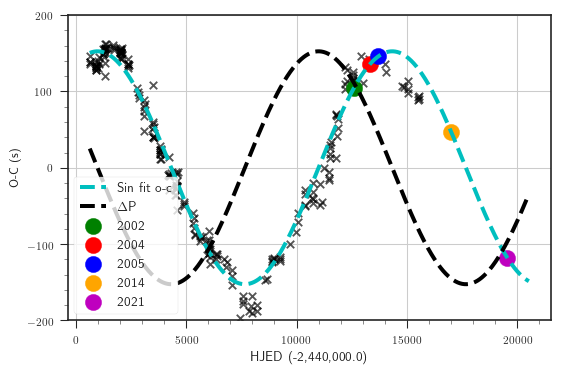

In [5]:
fig, ax1 = P.subplots(figsize=(6,4), dpi=96)

# plot oc
ax1.scatter(tE-constant, oc, marker='x', c='k', alpha=2./3)

if mode == 0:
    # Plot fit from Vaccaro 2018
    x = N.linspace(N.min(tE), N.max(tE)+5000, 1000)
#   y = -0.0015*N.sin(2*N.pi/(10932.)*(x + 2441781.))
#    ax1.plot(x-constant, y, 'brown')    
    #
    ax1.set_ylim((-0.0025,0.0020))
    ax1.yaxis.set_major_locator(MultipleLocator(.0005))
    ax1.xaxis.set_minor_locator(MultipleLocator(1000))
    ax1.xaxis.set_major_locator(MultipleLocator(4000))
    ax1.set_ylabel('O-C (d)')
    ax1.set_xlabel('HJED (-2,400,000.0)', fontsize='medium')
elif mode == 2:
    # Plot fit from Marchioni 2018
    x = N.linspace(N.min(tE), N.max(tE)+5000, 1000)
#    y = -150.8*N.sin(2*N.pi/(35.22*365.25)*(x + 41.5/(3600*24.)))
#    ax1.plot(x-constant, y, 'brown')
    #
    ax1.set_ylim((-200,200))
    ax1.yaxis.set_major_locator(MultipleLocator(100))
    ax1.yaxis.set_minor_locator(MultipleLocator(20))
    ax1.xaxis.set_minor_locator(MultipleLocator(1000))
    ax1.xaxis.set_major_locator(MultipleLocator(5000))
    ax1.set_ylabel('O-C (s)')
    ax1.set_xlabel('HJED (-2,440,000.0)', fontsize='medium')
    
# Observed times
ax1.scatter(t02-constant, est_amp*N.sin(2*N.pi/est_period*(t02 + est_phase)), color='g', s=150, marker='o',  label='2002')
ax1.scatter(t04-constant, est_amp*N.sin(2*N.pi/est_period*(t04 + est_phase)), color='r', s=150, marker='o',  label='2004')
ax1.scatter(t05-constant, est_amp*N.sin(2*N.pi/est_period*(t05 + est_phase)), color='b', s=150, marker='o',  label='2005')
ax1.scatter(t14-constant, est_amp*N.sin(2*N.pi/est_period*(t14 + est_phase)), color='orange', s=150, marker='o',  label='2014')
ax1.scatter(t21-constant, est_amp*N.sin(2*N.pi/est_period*(t21 + est_phase)), color='m', s=150, marker='o',  label='2021')

# our basic sinoidal fit:
ax1.plot(x-constant, est_amp*N.sin(2*N.pi/est_period*(x + est_phase)), '--c', lw=3, label="Sin fit o-c")    
ax1.plot(x-constant, est_amp*N.sin(2*N.pi/est_period*(x + est_phase)+N.pi/2), '--k', lw=3, label="$\Delta$P")    

    
P.legend(fontsize='medium', loc='lower left', frameon=True)
P.grid(True)
P.tight_layout()
#P.savefig('/Users/bzaire/Reports/figs/oc_vaccaro.pdf', bbox_inches='tight')
P.show()

---

2. # Plot curve $\propto \frac{dP}{P}$ from fit to o-c assuming a phase shift of $\frac{\pi}{2}$ 

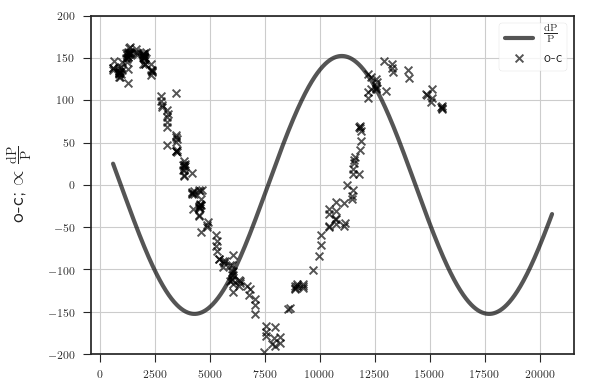

In [6]:
fig, ax1 = P.subplots(figsize=(6,4), dpi=100)

# plot oc
ax1.scatter(tE-constant, oc, marker='x', c='k', alpha=2./3, label='o-c')
#ax1.plot(x-constant, N.abs(est_amp*N.sin(2*N.pi/est_period*(x + est_phase))), 'c', lw=3, alpha=2./3, label="o-c")    
ax1.plot(x-constant, est_amp*N.sin(2*N.pi/est_period*(x + est_phase)+N.pi/2), 'k', lw=3, alpha=2./3, label=r"$\frac{\mathrm{dP}}{\mathrm{P}}$")    
ax1.set_ylim((-200,200))
ax1.set_ylabel(r"o-c; $\propto \frac{\mathrm{dP}}{\mathrm{P}}$", fontsize='x-large', labelpad=10)
    
P.legend(fontsize='medium', loc='upper right', frameon=True)
P.grid(True)

P.tight_layout()
P.show()

 - overplotting magnetic measurements

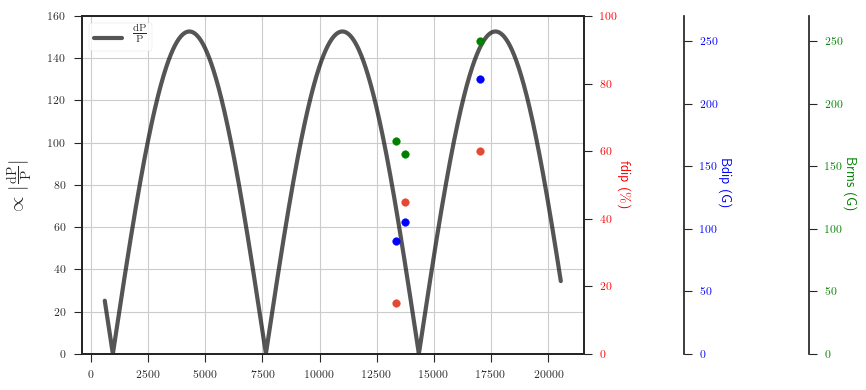

In [7]:
fig, ax1 = P.subplots(figsize=(10,4), dpi=100)

# plot oc
#ax1.scatter(tE-constant, N.abs(oc), marker='x', c='k', alpha=2./3)
#ax1.plot(x-constant, N.abs(est_amp*N.sin(2*N.pi/est_period*(x + est_phase))), 'c', lw=3, alpha=2./3, label="o-c")    
ax1.plot(x-constant, N.abs(est_amp*N.sin(2*N.pi/est_period*(x + est_phase)+N.pi/2)), 'k', lw=3, alpha=2./3, label=r"$\frac{\mathrm{dP}}{\mathrm{P}}$")    
ax1.set_ylim((0,160))
ax1.set_ylabel(r"$\propto |\frac{\mathrm{dP}}{\mathrm{P}}|$", fontsize='x-large', labelpad=10)

    
P.legend(fontsize='medium', loc='upper left', frameon=True)
P.grid(True)

ax2 = ax1.twinx()
ax2.scatter(N.array([t04, t05, t14])-constant, [15, 45, 60])
ax2.set_ylabel(r'fdip ($\%$)', fontsize='medium', color='r', rotation=270, labelpad=10)
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim((0,100))

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
ax3.scatter(N.array([t04, t05, t14])-constant, [90, 105, 220], color='b')
ax3.set_ylabel('Bdip (G)', fontsize='medium', color='b', rotation=270, labelpad=10)
ax3.tick_params(axis='y', labelcolor='b')
ax3.set_ylim((0,270))

ax4 = ax1.twinx()
ax4.spines["right"].set_position(("axes", 1.45))
ax4.scatter(N.array([t04, t05, t14])-constant, [170, 160, 250], color='g')
ax4.set_ylabel('Brms (G)', fontsize='medium', color='g', rotation=270, labelpad=10)
ax4.tick_params(axis='y', labelcolor='g')
ax4.set_ylim((0,270))

P.tight_layout()
P.savefig('oc_diff.pdf', bbox_inches='tight')
P.show()

In [8]:
# Shears obtained for each data set
dO02 = 1.6; dO02err=6
dO04 = N.array((100, 129)); dO04err = N.array((5, 23)) # from stokes I and V respectively
dO05 = N.array((73, 48)); dO05err = N.array((2, 12))
dO14 = N.array((69, 45)); dO04err = N.array((1,3))
# Vector with shear values
dO = N.array([dO02, dO04[0], dO04[1], dO05[0], dO05[1], dO14[0], dO14[1]])

# Time of observations in TT
time =  N.array([2452602.00000,2453337.87674,2453337.87674,2453718.72517,2453718.72517, 2457021.96287, 2457021.96287])
time -= constant

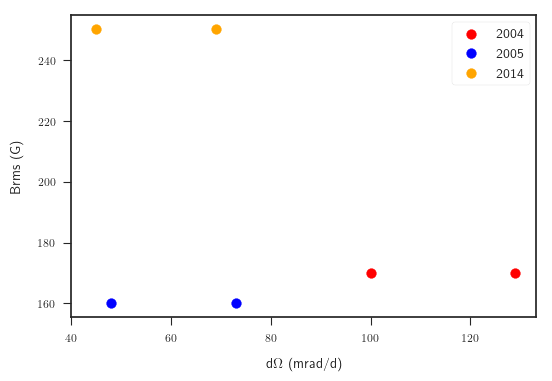

In [9]:
fig, ax1 = P.subplots(figsize=(6,4), dpi=100)

ax1.scatter(dO04, [170, 170], color='r', s=50, label='2004')
ax1.scatter(dO05, [160, 160], color='b', s=50, label='2005')
ax1.scatter(dO14, [250, 250], color='orange', s=50, label='2014')
ax1.set_xlabel(r'd$\Omega$ (mrad/d)', fontsize='medium', labelpad=10)
ax1.set_ylabel('Brms (G)', fontsize='medium', labelpad=10)
P.legend(fontsize='medium', frameon=True)
P.show()

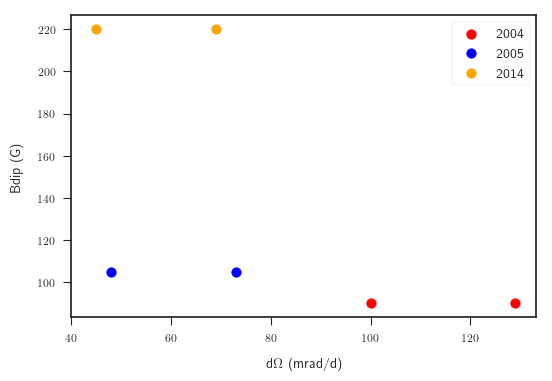

In [10]:
fig, ax1 = P.subplots(figsize=(6,4), dpi=100)
ax1.scatter(dO04, [90, 90], color='r', s=50, label='2004')
ax1.scatter(dO05, [105, 105], color='b', s=50, label='2005')
ax1.scatter(dO14, [220, 220], color='orange', s=50, label='2014')
ax1.set_xlabel(r'd$\Omega$ (mrad/d)', fontsize='medium', labelpad=10)
ax1.set_ylabel('Bdip (G)', fontsize='medium', labelpad=10)
P.legend(fontsize='medium', frameon=True)
P.show()


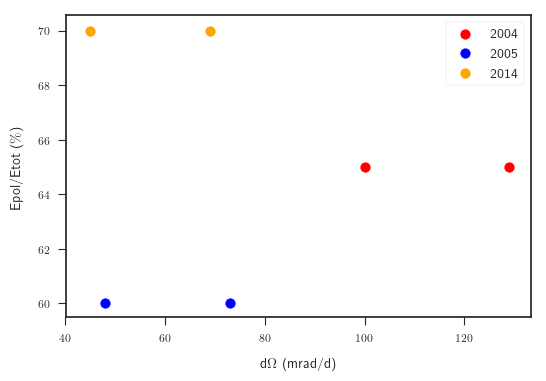

In [11]:
fig, ax1 = P.subplots(figsize=(6,4), dpi=100)
ax1.scatter(dO04, [65, 65], color='r', s=50, label='2004')
ax1.scatter(dO05, [60, 60], color='b', s=50, label='2005')
ax1.scatter(dO14, [70, 70], color='orange', s=50, label='2014')
ax1.set_xlabel(r'd$\Omega$ (mrad/d)', fontsize='medium', labelpad=10)
ax1.set_ylabel(r'Epol/Etot ($\%$)', fontsize='medium', labelpad=10)
P.legend(fontsize='medium', frameon=True)
P.show()


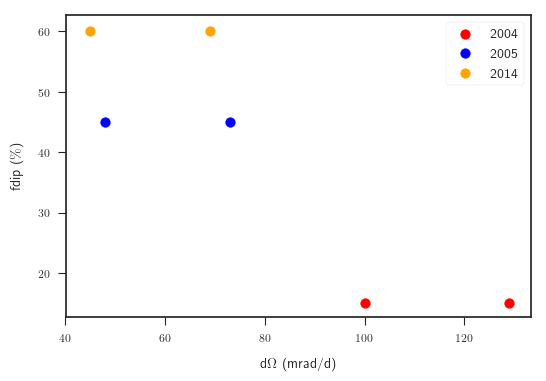

In [12]:
fig, ax1 = P.subplots(figsize=(6,4), dpi=100)
ax1.scatter(dO04, [15, 15], color='r', s=50, label='2004')
ax1.scatter(dO05, [45, 45], color='b', s=50, label='2005')
ax1.scatter(dO14, [60, 60], color='orange', s=50, label='2014')
ax1.set_xlabel(r'd$\Omega$ (mrad/d)', fontsize='medium', labelpad=10)
ax1.set_ylabel(r'fdip ($\%$)', fontsize='medium', labelpad=10)
P.legend(fontsize='medium', frameon=True)
P.show()

No handles with labels found to put in legend.


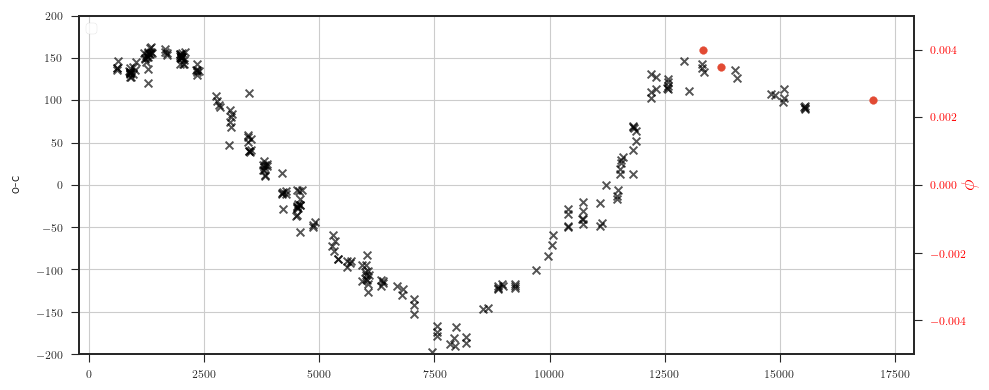

In [17]:
fig, ax1 = P.subplots(figsize=(10,4), dpi=100)

# plot oc
ax1.scatter(tE-constant,oc, marker='x', c='k', alpha=2./3)
#ax1.plot(x-constant, N.abs(est_amp*N.sin(2*N.pi/est_period*(x + est_phase))), 'c', lw=3, alpha=2./3, label="o-c")    
#ax1.plot(x-constant, N.abs(est_amp*N.sin(2*N.pi/est_period*(x + est_phase)+N.pi/2)), 'k', lw=3, alpha=2./3, label=r"$\frac{\mathrm{dP}}{\mathrm{P}}$")    
ax1.set_ylim((-200,200))
ax1.set_ylabel(r"o-c", fontsize='medium', labelpad=10)

P.legend(fontsize='medium', loc='upper left', frameon=True)
P.grid(True)

ax2 = ax1.twinx()
ax2.scatter(N.array([t04, t05, t14])-constant, N.array([0.0040, 0.0035, 0.0025]))
ax2.set_ylabel(r'$\phi$', fontsize='x-large', color='r', rotation=270, labelpad=10)
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim((-0.005,0.005))

P.tight_layout()
P.show()

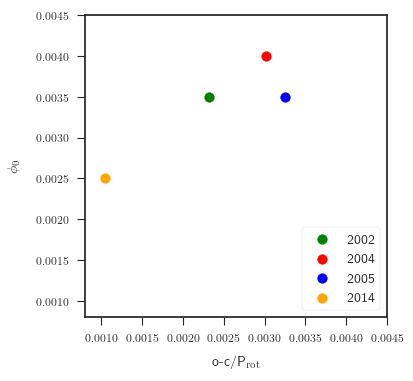

In [14]:
fig, ax1 = P.subplots(figsize=(6,4), dpi=100)
ax1.scatter(est_amp*N.sin(2*N.pi/est_period*(t02 + est_phase))/(Prot*24*3600), 0.0035, color='g', s=50, label='2002')
ax1.scatter(est_amp*N.sin(2*N.pi/est_period*(t04 + est_phase))/(Prot*24*3600), 0.0040, color='r', s=50, label='2004')
ax1.scatter(est_amp*N.sin(2*N.pi/est_period*(t05 + est_phase))/(Prot*24*3600), 0.0035, color='b', s=50, label='2005')
ax1.scatter(est_amp*N.sin(2*N.pi/est_period*(t14 + est_phase))/(Prot*24*3600), 0.0025, color='orange', s=50, label='2014')
ax1.set_xlabel(r'o-c/P$_\mathrm{rot}$', fontsize='medium', labelpad=10)
ax1.set_ylabel(r'$\phi_0$', fontsize='medium', labelpad=10)
ax1.set_aspect('equal')
ax1.set_xlim(0.0008,0.0045)
ax1.set_ylim(0.0008,0.0045)
P.legend(fontsize='medium', frameon=True, loc='lower right')
P.show()